In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainX, testX = trainX.astype('float32') / 255.0,testX.astype('float32') / 255.0

In [6]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

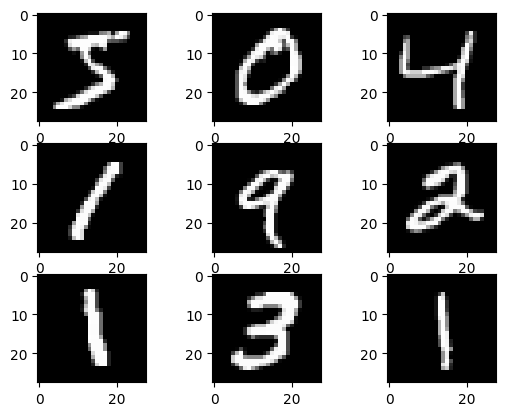

In [8]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.optimizers import SGD

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])

In [16]:
datagen = ImageDataGenerator(width_shift_range=0.1,
height_shift_range=0.1, horizontal_flip=False)
datagen.fit(trainX)
history = model.fit(datagen.flow(trainX, trainy, batch_size=32),steps_per_epoch=int(len(trainX) / 32),
                    epochs=10,
validation_data=(testX, testy))

Epoch 1/10
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 30:00 961ms/step - accuracy: 0.0625 - loss: 2.5623

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8028 - loss: 0.6127 - val_accuracy: 0.9734 - val_loss: 0.0830
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9734 - val_loss: 0.0830
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9591 - loss: 0.1344 - val_accuracy: 0.9809 - val_loss: 0.0610
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9809 - val_loss: 0.0610
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9702 - loss: 0.0987 - val_accuracy: 0.9808 - val_loss: 0.0554
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9808 - val_loss: 0.0554
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9757 - loss: 0.0810 - val_accuracy: 0.9829 - val_loss: 0.0486
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9829 - val_loss: 0.0486
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step

In [16]:
_, accuracy = model.evaluate(testX, testy, verbose=0)
print(f'Accuracy: {accuracy * 100:.2f}%')

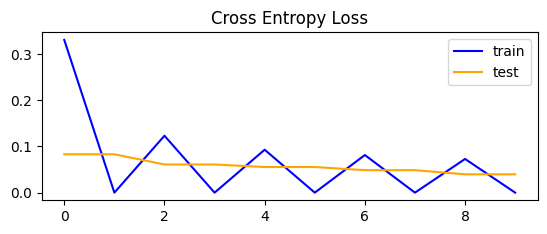

In [17]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()

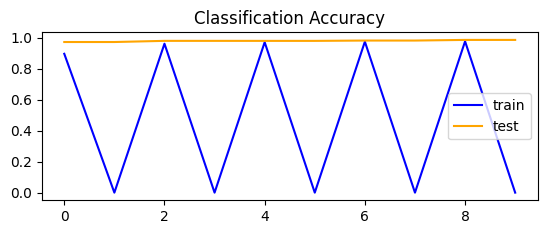

In [20]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange',
label='test')
plt.legend()
plt.show()